<a href="https://www.kaggle.com/code/bugraunaltay/notebookf63e06e534?scriptVersionId=121315314" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

KNN Test Size:  10.0
Success: 95.93%


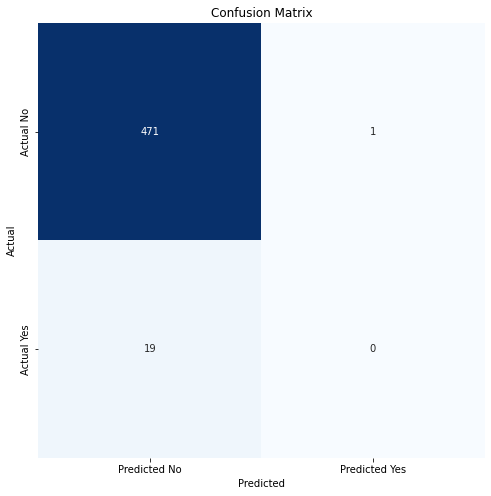

Logistic Regression Test Size:  10.0
Success: 94.30%


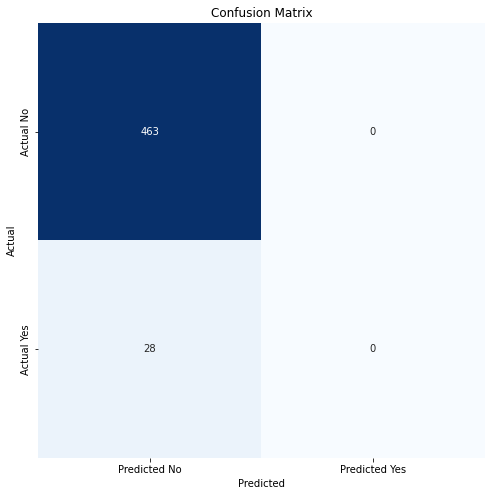

Linear Regression Test Size:  10.0
Success: 95.52%


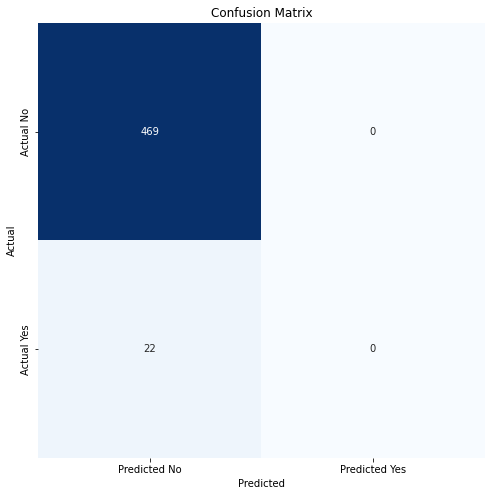

Decision Tree Test Size:  10.0
Success: 91.04%


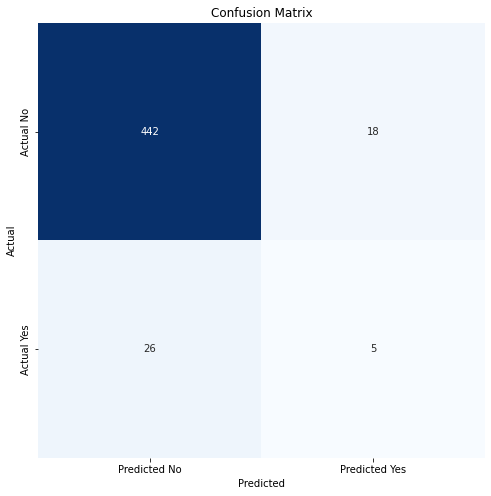

Random Forest Test Size:  10.0
Success: 95.11%


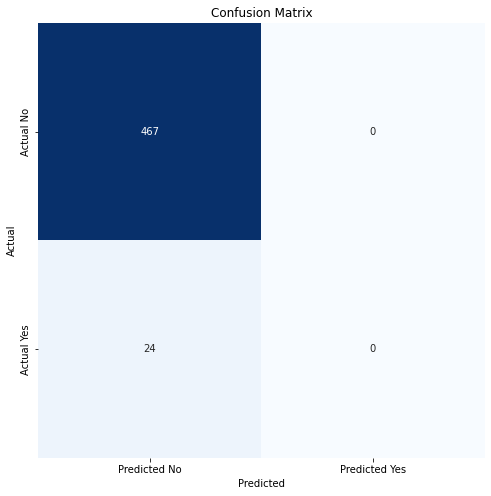

KNN Test Size:  20.0
Success: 96.13%


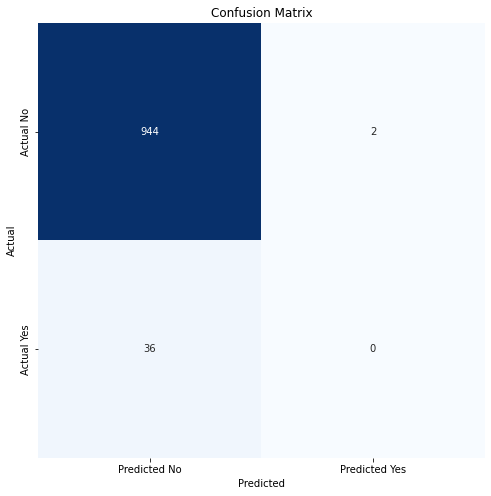

Logistic Regression Test Size:  20.0
Success: 96.54%


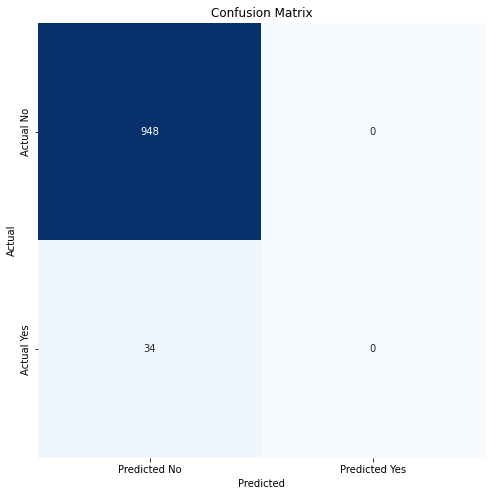

Linear Regression Test Size:  20.0
Success: 95.62%


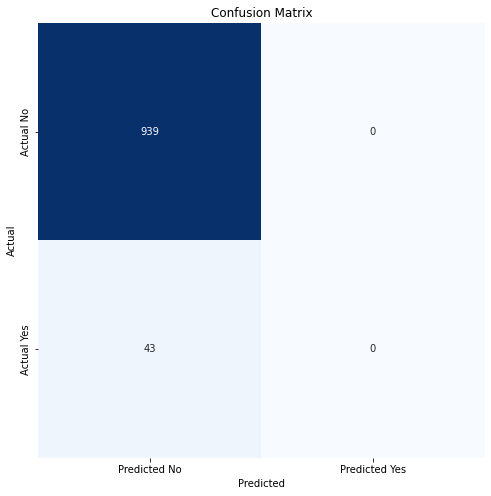

Decision Tree Test Size:  20.0
Success: 92.36%


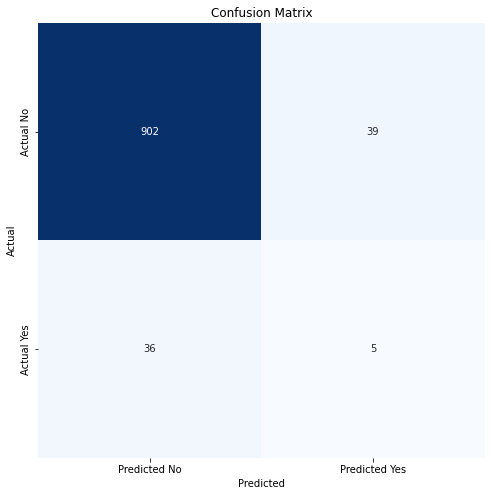

Random Forest Test Size:  20.0
Success: 95.52%


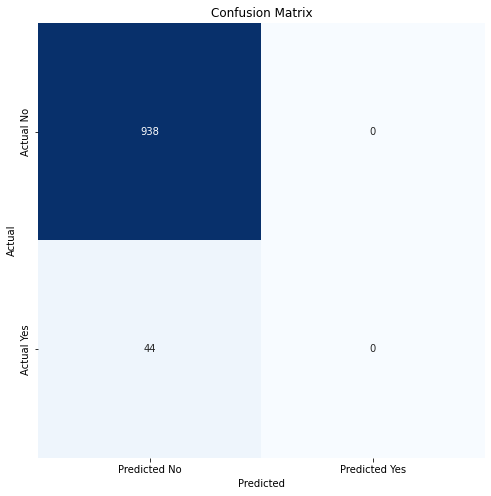

KNN Test Size:  30.0
Success: 95.72%


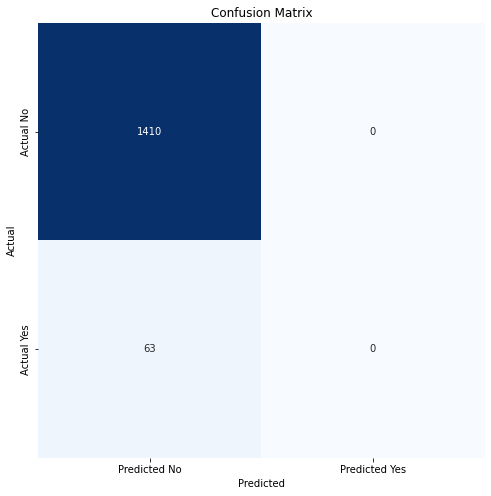

Logistic Regression Test Size:  30.0
Success: 95.32%


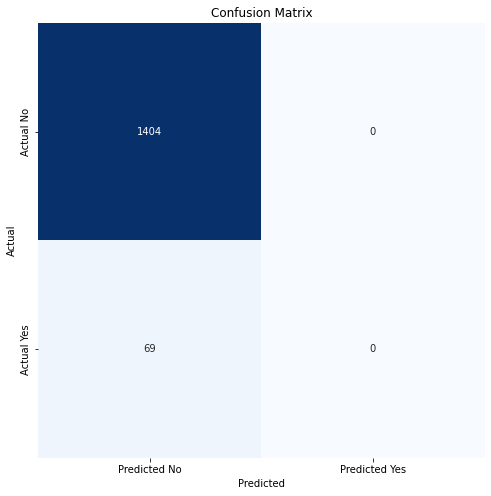

Linear Regression Test Size:  30.0
Success: 95.59%


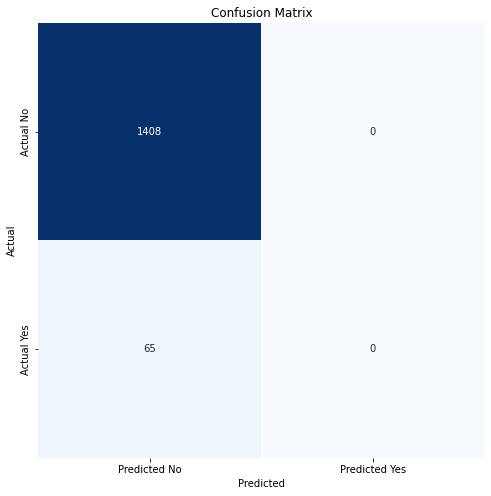

Decision Tree Test Size:  30.0
Success: 91.85%


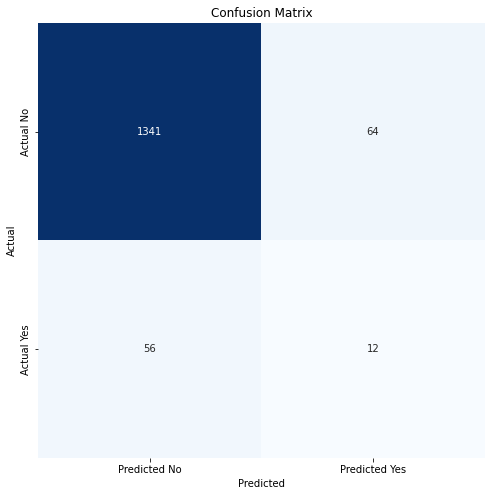

Random Forest Test Size:  30.0
Success: 96.13%


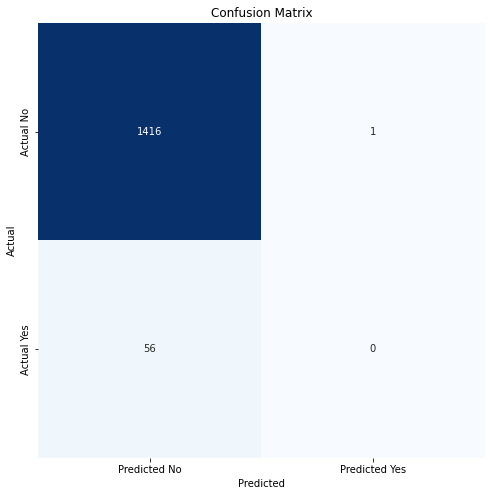

KNN Test Size:  40.0
Success: 95.67%


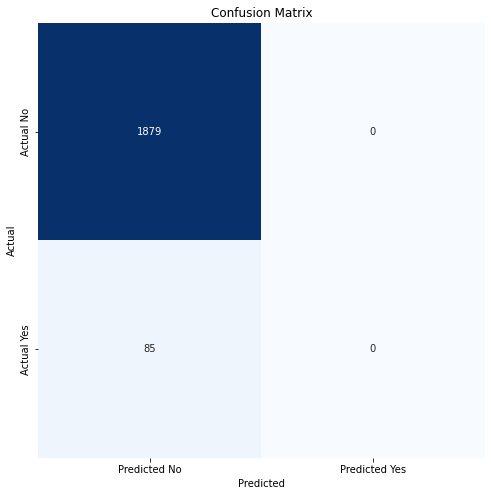

Logistic Regression Test Size:  40.0
Success: 95.62%


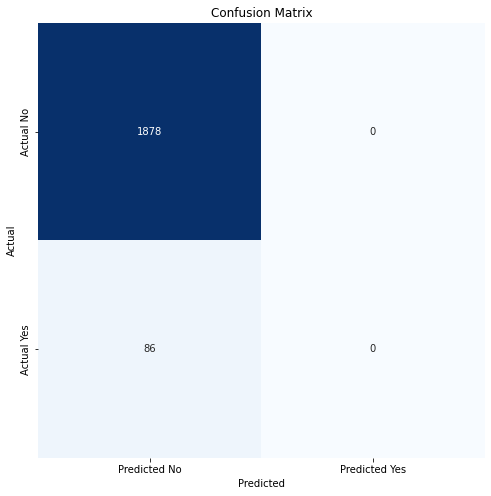

Linear Regression Test Size:  40.0
Success: 95.72%


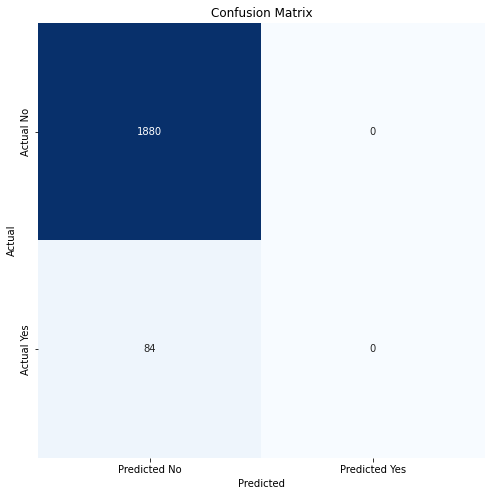

Decision Tree Test Size:  40.0
Success: 91.19%


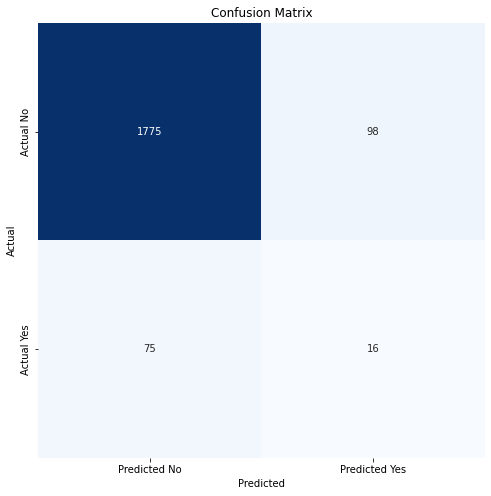

Random Forest Test Size:  40.0
Success: 95.32%


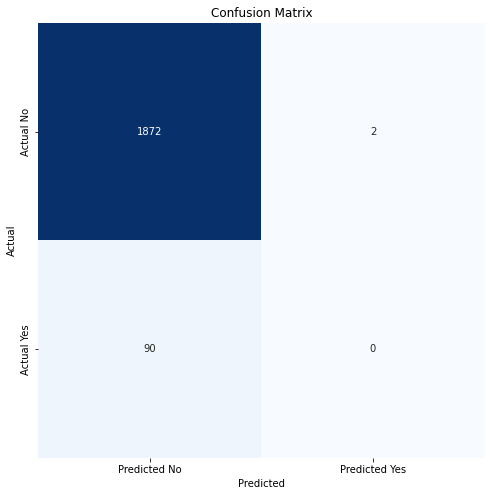

KNN Test Size:  50.0
Success: 95.89%


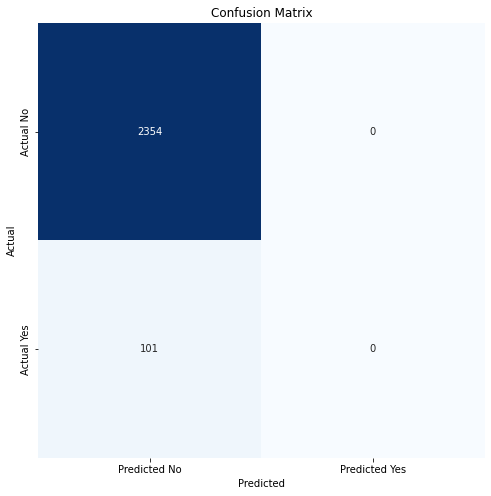

Logistic Regression Test Size:  50.0
Success: 95.97%


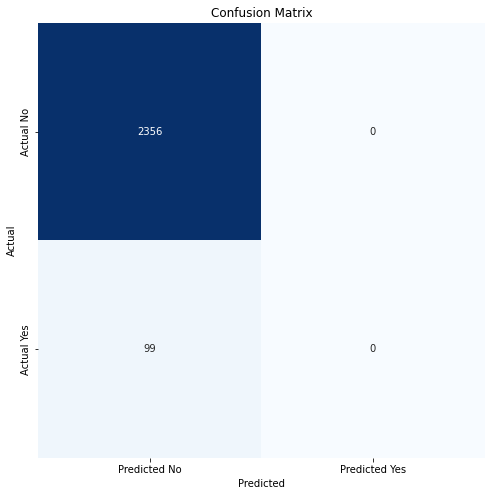

Linear Regression Test Size:  50.0
Success: 95.89%


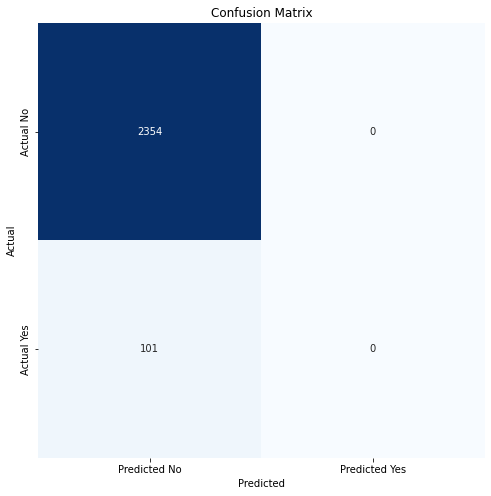

Decision Tree Test Size:  50.0
Success: 91.81%


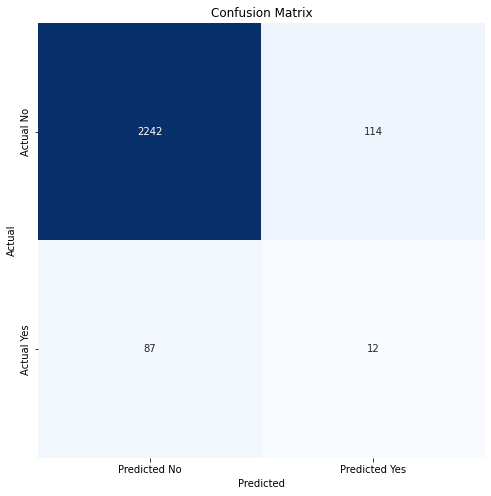

Random Forest Test Size:  50.0
Success: 95.93%


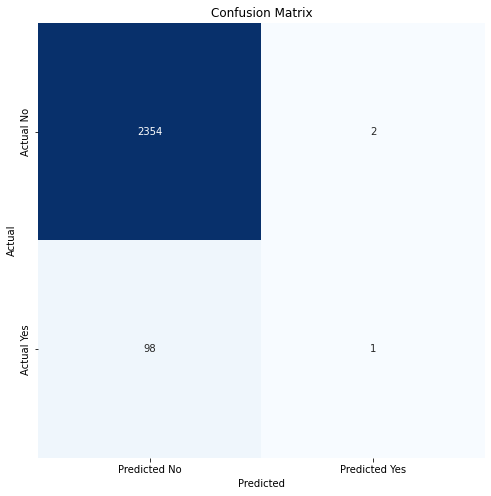

defaultdict(<class 'list'>, {'KNN': [(array([[471,   1],
       [ 19,   0]]), 0.9592668024439919), (array([[944,   2],
       [ 36,   0]]), 0.9613034623217923), (array([[1410,    0],
       [  63,    0]]), 0.9572301425661914), (array([[1879,    0],
       [  85,    0]]), 0.9567209775967414), (array([[2354,    0],
       [ 101,    0]]), 0.9588594704684318)], 'LogisticRegression': [(array([[463,   0],
       [ 28,   0]]), 0.9429735234215886), (array([[948,   0],
       [ 34,   0]]), 0.9653767820773931), (array([[1404,    0],
       [  69,    0]]), 0.9531568228105907), (array([[1878,    0],
       [  86,    0]]), 0.9562118126272913), (array([[2356,    0],
       [  99,    0]]), 0.959674134419552)], 'LinearRegression': [(array([[469,   0],
       [ 22,   0]]), 0.955193482688391), (array([[939,   0],
       [ 43,   0]]), 0.9562118126272913), (array([[1408,    0],
       [  65,    0]]), 0.9558723693143245), (array([[1880,    0],
       [  84,    0]]), 0.9572301425661914), (array([[2354,    0

In [1]:
# Import necessary libraries
import collections

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



def clean_up_data():
    # Read the sample data into a DataFrame
    df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
    
    # Check for missing values
    df.isnull().sum()
    
    # Drop rows with missing values
    df.dropna(inplace=True)
    
    # Fill missing values with a specific value
    df.fillna(0, inplace=True)
    
    # Convert non-numeric columns into numeric data using get_dummies
    df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
    
    # Normalize the numeric columns
    from sklearn.preprocessing import minmax_scale
    df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']] = minmax_scale(
        df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']])
    
    # print(df)
    df.to_csv('/kaggle/working/healthcare-dataset-stroke-data-cleaned.csv')
    return df


def train_knn(data_frame, test_size):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('stroke', axis=1), data_frame['stroke'],
                                                        test_size=test_size)
    # Train the KNN model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, predictions)
    
    # Import the confusion_matrix function
    from sklearn.metrics import confusion_matrix
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    print("KNN Test Size: ", test_size*100)
    print(f"Success: {score * 100:.2f}%")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the confusion matrix
    return ("KNN", cm, score)


def train_logistic_regression(data_frame, test_size):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('stroke', axis=1), data_frame['stroke'], test_size=test_size)
    
    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, predictions)
    
    # Import the confusion_matrix function
    from sklearn.metrics import confusion_matrix
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    print("Logistic Regression Test Size: ", test_size*100)
    print(f"Success: {score * 100:.2f}%")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the confusion matrix
    return ("LogisticRegression", cm, score)


def train_linear_regression(data_frame, test_size):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('stroke', axis=1), data_frame['stroke'], test_size=test_size)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Round predictions to the nearest integer, as the target variable is a binary classification problem
    predictions = [round(x) for x in predictions]
    
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, predictions)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Evaluate the model's performance
    from sklearn.metrics import mean_squared_error
    
    print("Linear Regression Test Size: ", test_size*100)
    print(f"Success: {score * 100:.2f}%")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the confusion matrix
    return ("LinearRegression", cm, score)



def train_decision_tree(data_frame, test_size):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('stroke', axis=1), data_frame['stroke'], test_size=test_size)
    
    # Train the decision tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, predictions)
    
    print("Decision Tree Test Size: ", test_size*100)
    print(f"Success: {score * 100:.2f}%")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the confusion matrix
    return ("DecisionTreeClassifier", cm, score)


def train_random_forest(data_frame, test_size):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_frame.drop('stroke', axis=1), data_frame['stroke'], test_size=test_size)
    
    # Train the random forest model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, predictions)
    
    # Import the confusion_matrix function
    from sklearn.metrics import confusion_matrix
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    print("Random Forest Test Size: ", test_size*100)
    print(f"Success: {score * 100:.2f}%")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print the confusion matrix
    return ("RandomForestClassifier", cm, score)




clean_data_frame = clean_up_data()

test_splits = [0.1, 0.2, 0.3, 0.4, 0.5]

scores = collections.defaultdict(list)

for split in test_splits:
    alg_name, cm, score = train_knn(clean_data_frame, split)
    scores[alg_name].append((cm, score))
    alg_name, cm, score = train_logistic_regression(clean_data_frame, split)
    scores[alg_name].append((cm, score))
    alg_name, cm, score = train_linear_regression(clean_data_frame, split)
    scores[alg_name].append((cm, score))
    alg_name, cm, score = train_decision_tree(clean_data_frame, split)
    scores[alg_name].append((cm, score))
    alg_name, cm, score = train_random_forest(clean_data_frame, split)
    scores[alg_name].append((cm, score))


print(scores)